In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Read data.

In [12]:
data  = pd.read_csv('/content/Medicalpremium.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [13]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [14]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

## Check null values

In [15]:
data.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


### There are no null record present in our dataset.

## Heatmap

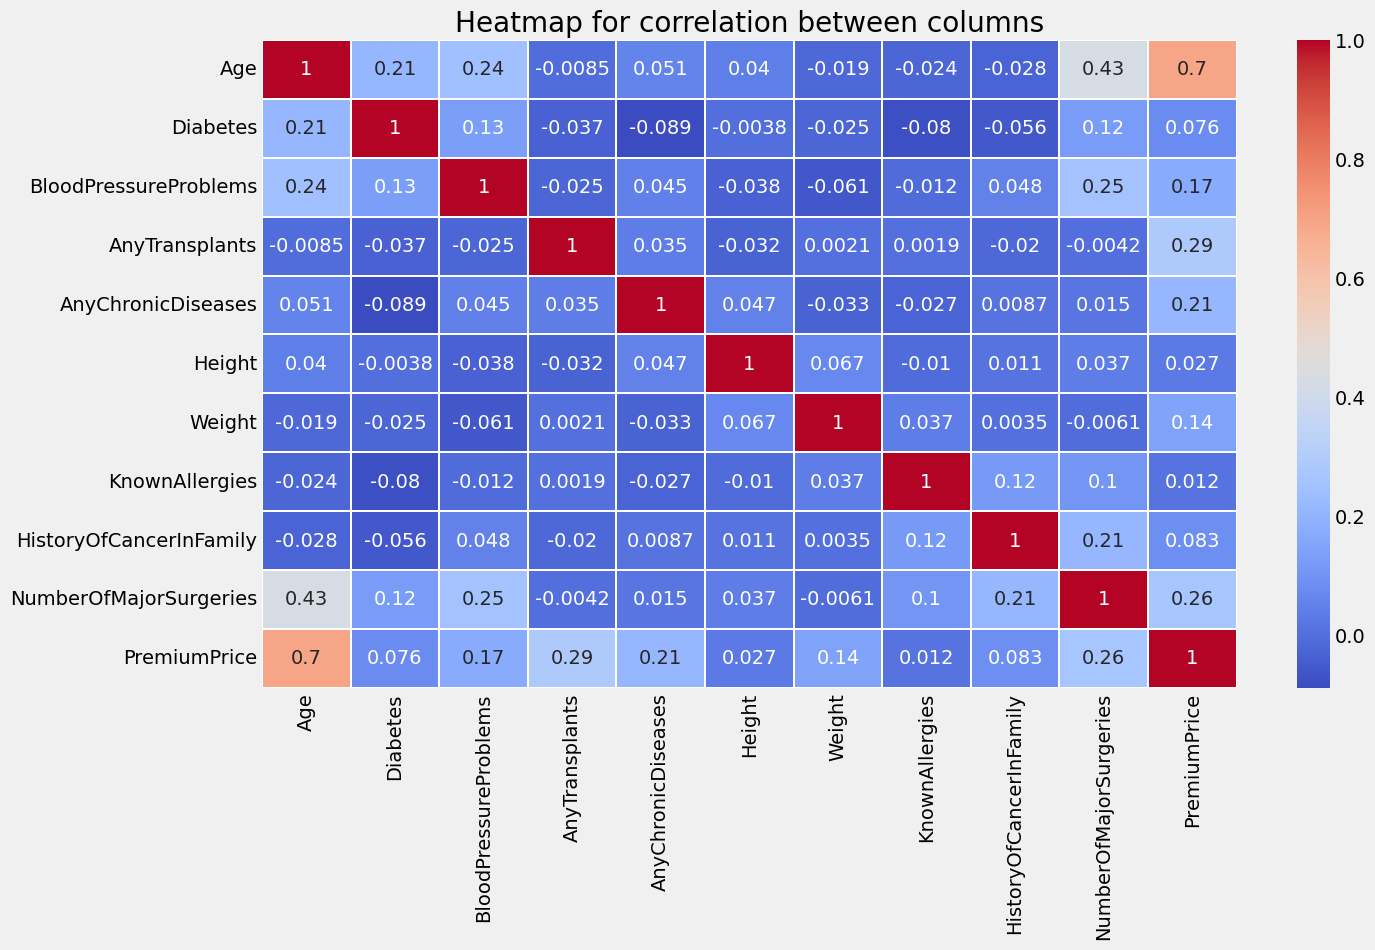

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

## Check datatypes of columns

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [18]:
data.Age.describe()

,Age
count,986.000000
mean,41.745436
std,13.963371
min,18.000000
25%,30.000000
50%,42.000000
75%,53.000000
max,66.000000


# Data visualizations

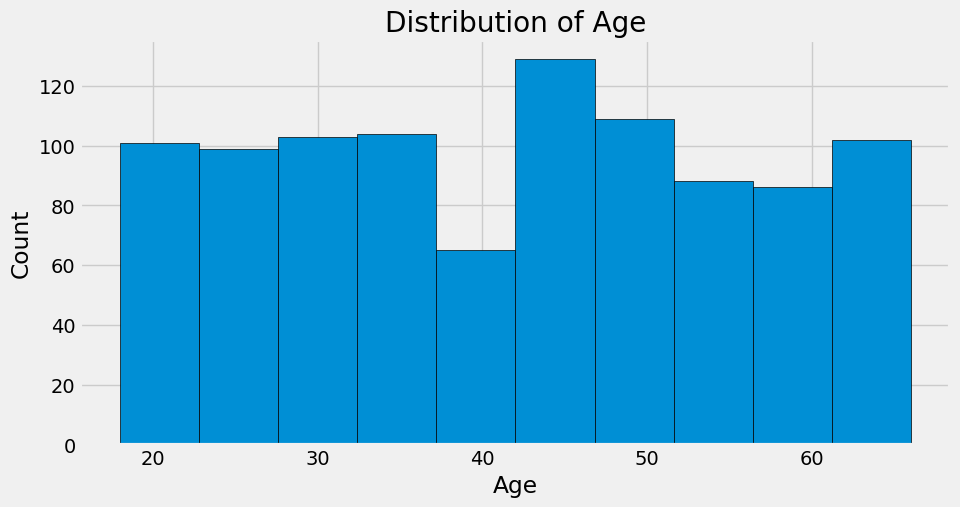

In [19]:
plt.figure(figsize=(10,5))
plt.hist(data.Age,edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Count");
plt.title("Distribution of Age");

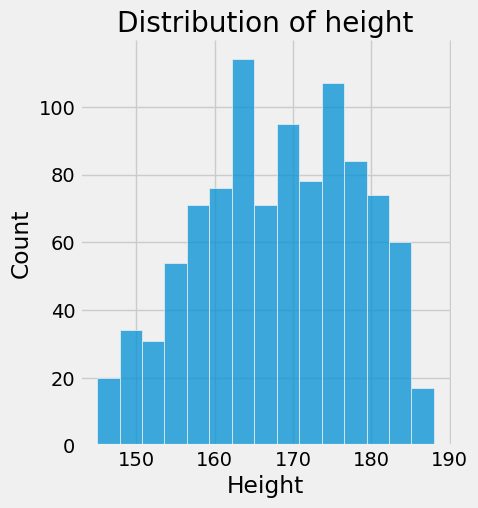

In [20]:
sns.displot(data.Height)
plt.title("Distribution of height");


## The distribution of patient heights right skewed with centre of 168 with no outlier.

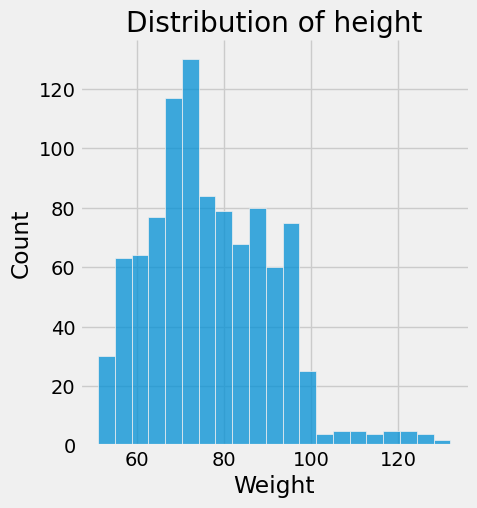

In [21]:
sns.displot(data.Weight)
plt.title("Distribution of height");

## The distribution of patient weights left skewed with centre of 75.

In [22]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [23]:
X = data.drop('PremiumPrice',axis=1)
y = data.PremiumPrice

# Normalization

In [24]:
scalar =  StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])


## Train and Test split of Data.


In [25]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# Model

In [30]:
models = {
    LinearRegression():'Linear Regression',
    Ridge():'Ridge Regression',
    Lasso():'Lasso Regression',
    SVR(kernel='linear'):'Support Vector Machine',
    RandomForestRegressor():'RandomForest',

}
for m in models.keys():
    m.fit(X_train,y_train)


In [31]:
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Linear Regression is :  68.94071160558988 %
Accuracy Score for Ridge Regression is :  68.86685393102887 %
Accuracy Score for Lasso Regression is :  68.92612230263563 %
Accuracy Score for Support Vector Machine is :  14.098745080855545 %
Accuracy Score for RandomForest is :  79.78718384774301 %


# Finding Important Features in Random Forest

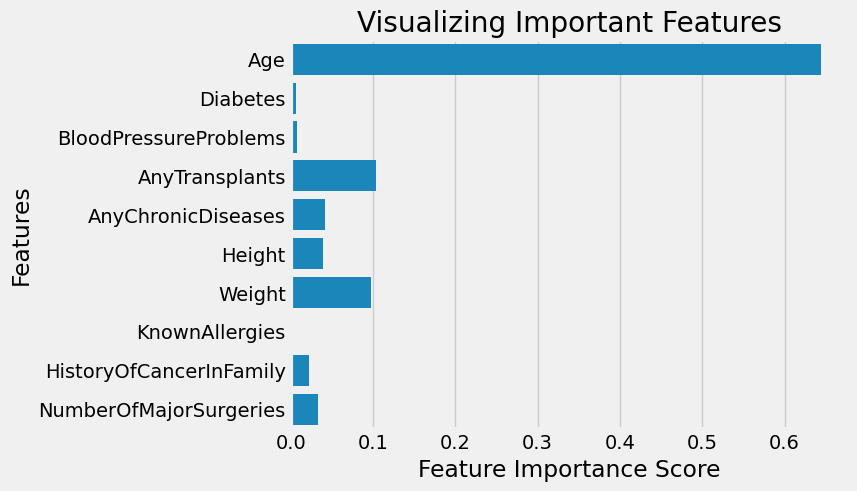

In [33]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

# Hyper parameter Fine Tuning for RandomForest

In [41]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 4]
}

In [42]:
# the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='r2',n_jobs=-1,verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [None, 1, 2, 4],
                         'min_samples_split': [None, 2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [46]:
# Get the best parameters and best score
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [47]:
# Create a new Random Forest model with the best parameters
best_rf = RandomForestRegressor(**best_params)

# Fit the best model to the training data
best_rf.fit(X_train, y_train)

# Evaluate the best model on the test data
test_score = best_rf.score(X_test, y_test)
print("Test R2 Score with Best Model:", test_score)


Test R2 Score with Best Model: 0.8237588686692401


In [48]:
results = {
    'Model': ['Random Forest'],
    'Train R2 Score': [best_rf.score(X_train, y_train)],
    'Test R2 Score': [best_rf.score(X_test, y_test)]
}

results_df = pd.DataFrame(results)
print(results_df)

           Model  Train R2 Score  Test R2 Score
0  Random Forest        0.894642       0.823759
